##Partie 1

**Génération de la fonction get_text() qui prends comme argument l'alphabet, les variables ipa, n, m et ino. La fonction retourne le texte et le motif suivant les conditions mentionnées dans l'énoncé**

In [1]:
alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [2]:
import random

def insert(chn,index,val):
    chn = chn[:index]+val+chn[index:]
    return chn



def get_text(alphab,ipa,n,m,ino):

  if ipa == 0:
    text=''.join(random.choices(population=alphab,weights=[1/len(alphab) for i in range(0, len(alphab))],k=n))
    motif=''.join(random.choices(population=alphab,weights=[1/len(alphab) for i in range(0, len(alphab))],k=m))

  if (ipa == 1):
    text=''.join(random.choices(population=alphab,weights=[random.randint(1, 10) for i in range(0, len(alphab))],k=n))
    motif=''.join(random.choices(population=alphab,weights=[random.randint(1, 10) for i in range(0, len(alphab))],k=m))

  
  
  #generating the motif

  if ino ==0 :
    num = text.count(motif)
    if num>0:
      text.replace(motif,"")
    print("condition ino = 0")

  if ino==1 :
    num = text.count(motif)
    print("condition ino = 1")
    if num == 0:
      text=insert(text,random.randint(0,len(text)),motif)
      print(motif + " inséré dans le texte")

  if ino==2 :
    num = text.count(motif)
    print("condition ino = 1")
    if num < 5:
      j=5-num
      for i in range(0,j):
        text=insert(text,random.randint(0,len(text)),motif)
      num = text.count(motif)
      
      
      print(motif, "inséré dans le texte ",j,"fois")



  return text,motif

Les tests pour vérifier

In [75]:
alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
get_text(alphab= alphabet[:4],ipa=0, n=10, m=3,ino=2)

condition ino = 1
cbb inséré dans le texte  4 fois


('acabdcbbacccbbbbcbbcbb', 'cbb')

In [96]:
get_text(1,1,5000,20,1)

found_2


('fwhsfhlkdqjsfegqhsxpulddliuzyzfescglfuflsoirelyxlocsrwztviiuuisatebfsfifuwwlcpzyzeccofxcxfswptcxdxqthsekaaufxuwzfhfsifkvtticxqmwqzwulgoikfuctwgemarwslfekafwxbfqwndiobdoccpgcxdeqsubptsfdlpyxurficeseddqiqtcojsxfwtwvwzidepgxpizzlalsxzwwcqfhaxkttxzawhjtzrwctsrteelcqezuwtcknghaxtkmwisurcxukeeeuzqfmyrahzawfexeuccetxiqbffwtujciuciicenravcrwdqiscxxwlkxhxqupeczzfzaselxlcqkzfngchotlcigcugadalfxuzqefhtrtxqzxkiwlfhtpcucxkhkeuxslelicwndrcisqkxwbnzwzwztwzpcffxiiefvnzcfisxktzkfxjhuowkrtjhsucpcskpsaiflwiuitexocsvgkergqoqwihwztxfphfcfckbdwrwaewgwthqtmxkkkduxquiegpciglefcthesfccxtisqfelsbeillcagztaqzuhizjtetftlhcqwrfctkqaheckcfdlfwqxijhakrekxuwkfhixasefhkeerfexvunvitykzcghxeeavtjifbuticfwzkuikkelfvcruzzskhutieexfdfeloiiffaiuxeohrstzsczcytqizulpewrtcexatlxtrieucasrauokuwzrfnwvkzkrhfkwqrtqhkkiahhulefkwcvitscwwetniextvlcritxlcwowvwicqzshciyqaxgrqsssafroxqwhezewewwacwveiqfeeexyzxwwtkcfuqiteywcfcauqkspeqzqfwxeqhkefuhrsvoibhferfreizfglaticafizfinxidqxekwchpiwrjxkazsywvikxeolwlvhrqqakigtrzluhfiqfktftvrqvfxft

### Partie 2

In [3]:
def suffixArray(s):
    ''' Given T return suffix array SA(T).  Uses "sorted"
        function for simplicity, which is probably very slow. '''
    satups = sorted([(s[i:], i) for i in range(len(s))])
    return list(map(lambda x: x[1], satups)) # extract, return just offsets

def bwtFromSa(t, sa=None):
    ''' Given T, returns BWT(T) by way of the suffix array. '''
    bw = []
    dollarRow = None
    if sa is None:
        sa = suffixArray(t)
    for si in sa:
        if si == 0:
            dollarRow = len(bw)
            bw.append('$')
        else:
            bw.append(t[si-1])
    return ''.join(bw), dollarRow # return string-ized version of list bw

In [4]:
class FmCheckpoints(object):
    ''' Manages rank checkpoints and handles rank queries, which are
        O(1) time, with the checkpoints taking O(m) space, where m is
        length of text. '''
    
    def __init__(self, bw, cpIval=4):
        ''' Scan BWT, creating periodic checkpoints as we go '''
        self.cps = {}        # checkpoints
        self.cpIval = cpIval # spacing between checkpoints
        tally = {}           # tally so far
        # Create an entry in tally dictionary and checkpoint map for
        # each distinct character in text
        for c in bw:
            if c not in tally:
                tally[c] = 0
                self.cps[c] = []
        # Now build the checkpoints
        for i, c in enumerate(bw):
            tally[c] += 1 # up to *and including*
            if i % cpIval == 0:
                for c in tally.keys():
                    self.cps[c].append(tally[c])
    
    def rank(self, bw, c, row):
        ''' Return # c's there are in bw up to and including row '''
        if row < 0 or c not in self.cps:
            return 0
        i, nocc = row, 0
        # Always walk to left (up) when calculating rank
        while (i % self.cpIval) != 0:
            if bw[i] == c:
                nocc += 1
            i -= 1
        return self.cps[c][i // self.cpIval] + nocc

In [25]:
st = 'teststring'
#     0123456789
cps = FmCheckpoints(st)

In [26]:
[ cps.rank(st, 't', i) for i in range(10) ]

[1, 1, 1, 2, 2, 3, 3, 3, 3, 3]

In [9]:
class FmIndex():
    ''' O(m) size FM Index, where checkpoints and suffix array samples are
        spaced O(1) elements apart.  Queries like count() and range() are
        O(n) where n is the length of the query.  Finding all k
        occurrences of a length-n query string takes O(n + k) time.
        
        Note: The spacings in the suffix array sample and checkpoints can
        be chosen differently to achieve different bounds. '''
    
    @staticmethod
    def downsampleSuffixArray(sa, n=4):
        ''' Take only the suffix-array entries for every nth suffix.  Keep
            suffixes at offsets 0, n, 2n, etc with respect to the text.
            Return map from the rows to their suffix-array values. '''
        ssa = {}
        for i, suf in enumerate(sa):
            # We could use i % n instead of sa[i] % n, but we lose the
            # constant-time guarantee for resolutions
            if suf % n == 0:
                ssa[i] = suf
        return ssa
    
    def __init__(self, t):
        if t[-1] != '$':
            t += '$' # add dollar if not there already
        # Get BWT string and offset of $ within it
        sa = suffixArray(t)
        self.bwt, self.dollarRow = bwtFromSa(t, sa)
        # Get downsampled suffix array, taking every 1 out of 'ssaIval'
        # elements w/r/t T
        self.ssa = self.downsampleSuffixArray(sa, ssaIval)
        self.slen = len(self.bwt)
        # Make rank checkpoints
        print(cpIval)
        self.cps = FmCheckpoints(self.bwt, cpIval)
        # Calculate # occurrences of each character
        tots = dict()
        for c in self.bwt:
            tots[c] = tots.get(c, 0) + 1
        # Calculate concise representation of first column
        self.first = {}
        totc = 0
        for c, count in sorted(tots.items()):
            self.first[c] = totc
            totc += count
    
    def count(self, c):
        ''' Return number of occurrences of characters < c '''
        if c not in self.first:
            # (Unusual) case where c does not occur in text
            for cc in sorted(self.first.iterkeys()):
                if c < cc: return self.first[cc]
            return self.first[cc]
        else:
            return self.first[c]
    
    def range(self, p):
        ''' Return range of BWM rows having p as a prefix '''
        l, r = 0, self.slen - 1 # closed (inclusive) interval
        for i in range(len(p)-1, -1, -1): # from right to left
            l = self.cps.rank(self.bwt, p[i], l-1) + self.count(p[i])
            r = self.cps.rank(self.bwt, p[i], r)   + self.count(p[i]) - 1
            if r < l:
                break
        return l, r+1
    
    def resolve(self, row):
        ''' Given BWM row, return its offset w/r/t T '''
        def stepLeft(row):
            ''' Step left according to character in given BWT row '''
            c = self.bwt[row]
            return self.cps.rank(self.bwt, c, row-1) + self.count(c)
        nsteps = 0
        while row not in self.ssa:
            row = stepLeft(row)
            nsteps += 1
        return self.ssa[row] + nsteps
    
    def hasSubstring(self, p):
        ''' Return true if and only if p is substring of indexed text '''
        l, r = self.range(p)
        return r > l
    
    def hasSuffix(self, p):
        ''' Return true if and only if p is suffix of indexed text '''
        l, r = self.range(p)
        off = self.resolve(l)
        return r > l and off + len(p) == self.slen-1
    
    def occurrences(self, p):
        ''' Return offsets for all occurrences of p, in no particular order '''
        l, r = self.range(p)
        return [ self.resolve(x) for x in range(l, r) ]

In [30]:
fm.hasSubstring(result2)

False

In [26]:
result1,result2=get_text(alphabet[0:24],1,100000,20,2)

condition ino = 1
niuxosgsvetlsetaijmn inséré dans le texte  5 fois


In [24]:
len(result1)

300100

# Temps de création du FM-index en fonction du Taille de l'alphabet

In [37]:


import time
 
# record start time
list_i=[]
list_time_i=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
for i in gg:
  print(i)
  result1,result2=get_text(alphabet[0:i],0,100000,20,2)
  start = time.time()
  fm = FmIndex(result1)
  end = time.time()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(i)
  list_time_i.append((end-start) * 10**3)
# record end time

 
# print the difference between start



26
i got here
5
The time of execution of above program is : 2637.782096862793 ms
25
i got here
5
The time of execution of above program is : 2419.403076171875 ms
24
i got here
5
The time of execution of above program is : 2316.1067962646484 ms
23
i got here
5
The time of execution of above program is : 2344.9697494506836 ms
22
i got here
5
The time of execution of above program is : 2301.4376163482666 ms
21
i got here
5
The time of execution of above program is : 2483.086585998535 ms
20
i got here
5
The time of execution of above program is : 2300.1043796539307 ms
19
i got here
5
The time of execution of above program is : 2298.1433868408203 ms
18
i got here
5
The time of execution of above program is : 2285.964250564575 ms
17
i got here
5
The time of execution of above program is : 2437.166690826416 ms
16
i got here
5
The time of execution of above program is : 2393.287420272827 ms
15
i got here
5
The time of execution of above program is : 2262.427806854248 ms
14
i got here
5
The tim

In [35]:
gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
gg.reverse()

In [36]:
gg

[26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 6,
 5,
 4]

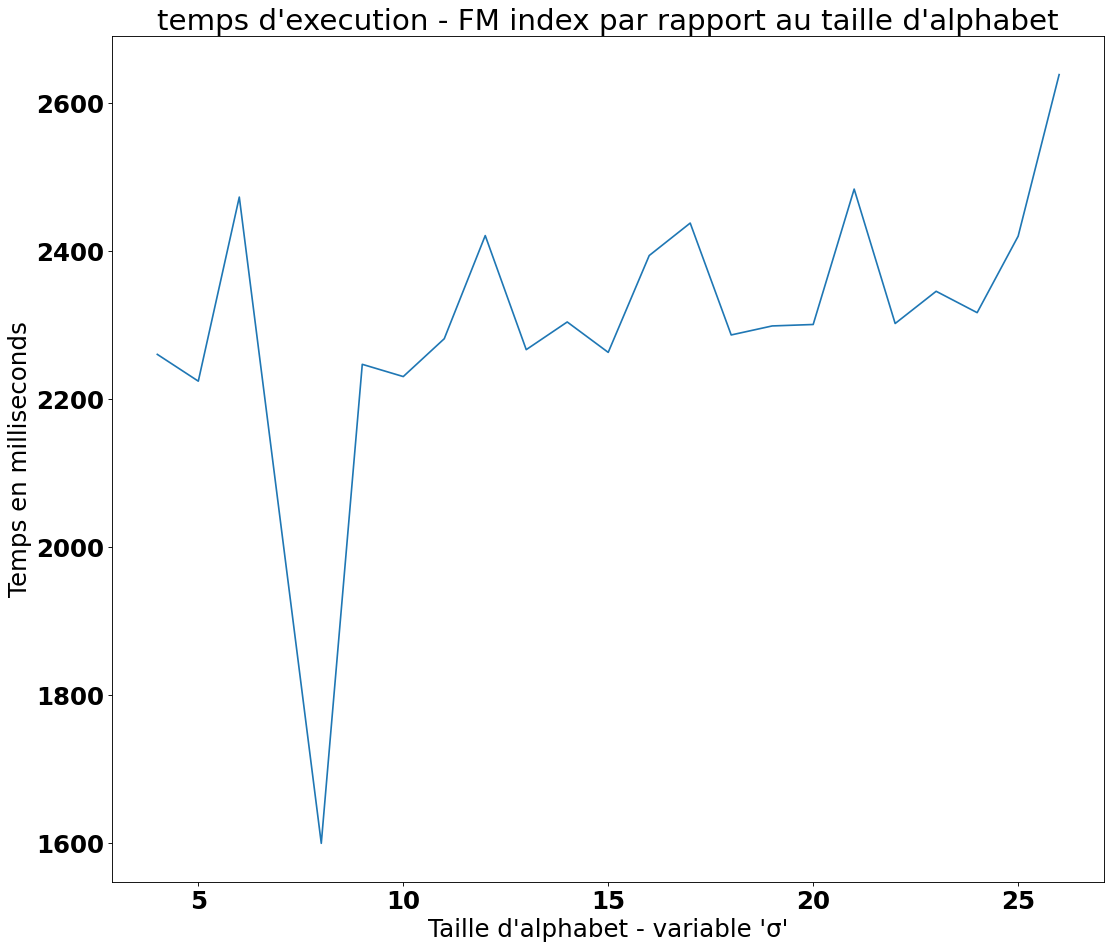

In [38]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel("Taille d'alphabet - variable '\u03C3'")
# naming the y axis
plt.ylabel('Temps en milliseconds')
  
# giving a title to my graph
plt.title("temps d'execution - FM index par rapport au taille d'alphabet")
  
# function to show the plot
plt.show()

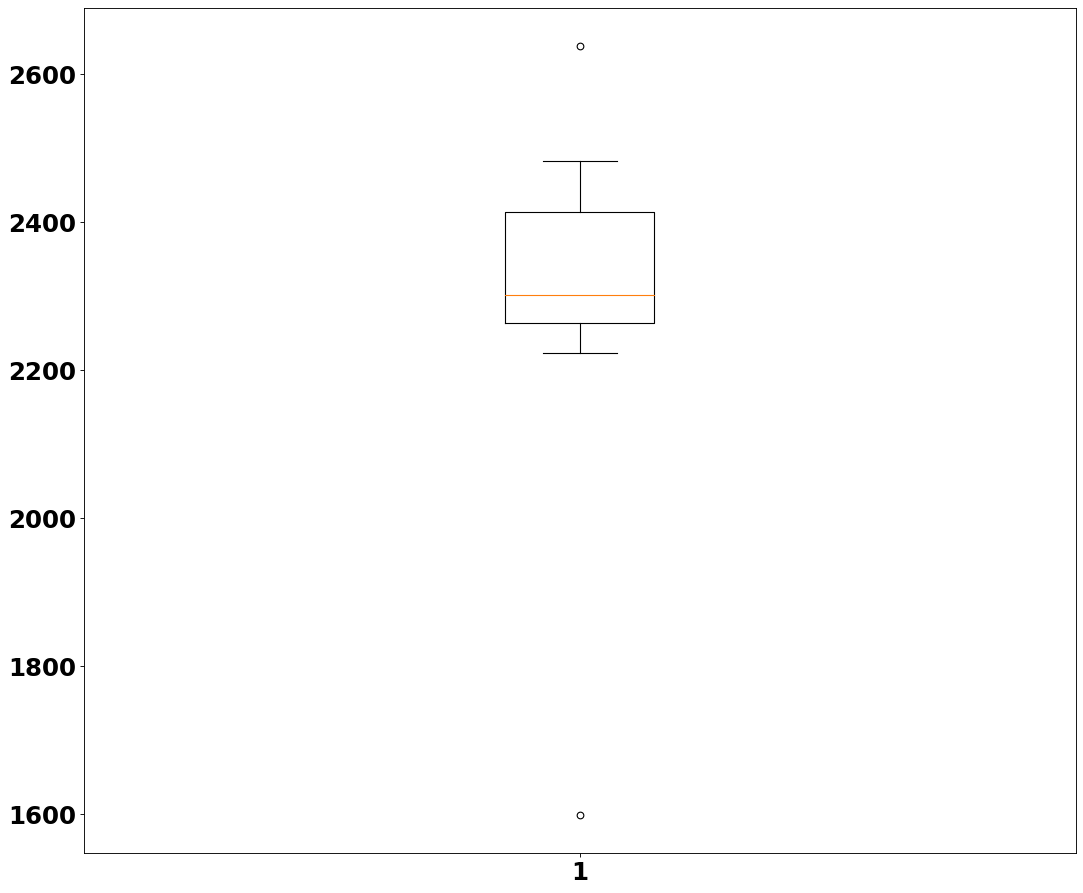

In [39]:

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
plt.boxplot(list_time_i)
plt.show()

# Temps de création du FM-index en fonction du Taille du Texte

In [8]:


import time
 
# record start time
list_i=[]
list_time_i=[]
 
# define a sample code segment
a = 0
for i in [50000,100000,150000,200000,250000,300000,350000,400000]:
  result1,result2=get_text(alphabet[0:4],1,i,1,0)
  start = time.time()
  
  fm = FmIndex(result1)
  end = time.time()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(i)
  list_time_i.append((end-start) * 10**3)
# record end time
# record end time

 
# print the difference between start



found
i got here
The time of execution of above program is : 1046.5097427368164 ms
found
i got here
The time of execution of above program is : 3359.618902206421 ms
found
i got here
The time of execution of above program is : 6633.0626010894775 ms
found
i got here
The time of execution of above program is : 10291.971921920776 ms
found
i got here
The time of execution of above program is : 14456.804275512695 ms
found
i got here
The time of execution of above program is : 19941.509008407593 ms
found
i got here
The time of execution of above program is : 25939.104080200195 ms
found
i got here
The time of execution of above program is : 32998.019218444824 ms


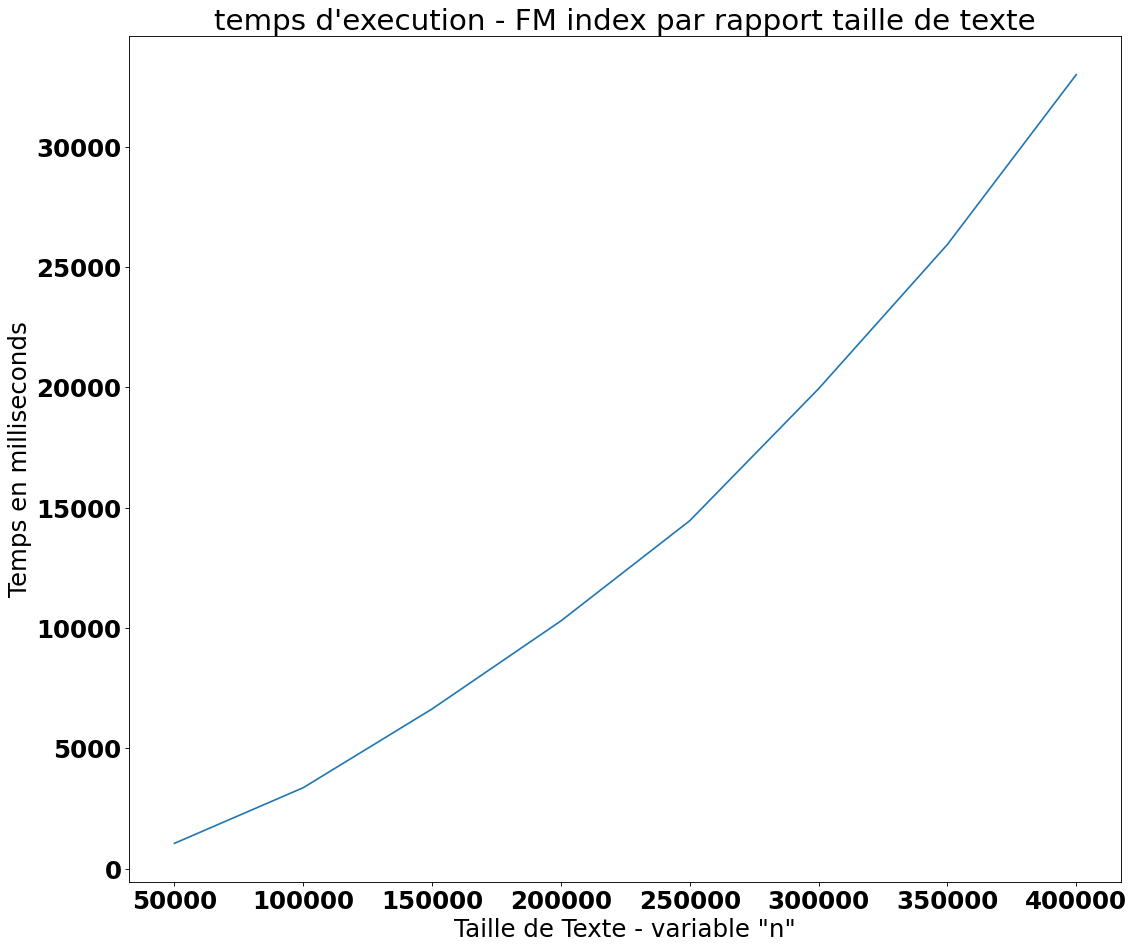

In [9]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Taille de Texte - variable "n"')
# naming the y axis
plt.ylabel('Temps en milliseconds')
  
# giving a title to my graph
plt.title("temps d'execution - FM index par rapport taille de texte")
  
# function to show the plot
plt.show()

# Impact mémoire - choix de “b” - échantillonnage du Tally

In [76]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
ssaIval=4
for cpIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  tracemalloc.start()
  start = time.time()
  
  fm = FmIndex(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(cpIval)
  
# record end time

 
# print the difference between start



4
25 memory blocks: 4889.1 KiB
46613360640
used memory : 10.399318
The time of execution of above program is : 3820.389747619629 ms
8
25 memory blocks: 2708.4 KiB
46613360640
used memory : 7.896543
The time of execution of above program is : 3443.1049823760986 ms
16
64506 memory blocks: 1763.8 KiB
46613360640
used memory : 6.109018
The time of execution of above program is : 3345.3152179718018 ms
32
46910 memory blocks: 1282.7 KiB
46613360640
used memory : 4.918418
The time of execution of above program is : 3543.6031818389893 ms
64
1 memory blocks: 1280.0 KiB
46613360640
used memory : 4.07813
The time of execution of above program is : 3323.3933448791504 ms
128
1 memory blocks: 1280.0 KiB
46613360640
used memory : 3.566018
The time of execution of above program is : 3193.7334537506104 ms
256
1 memory blocks: 1280.0 KiB
46613360640
used memory : 3.252266
The time of execution of above program is : 3257.6146125793457 ms
512
1 memory blocks: 1280.0 KiB
46613360640
used memory : 3.098962


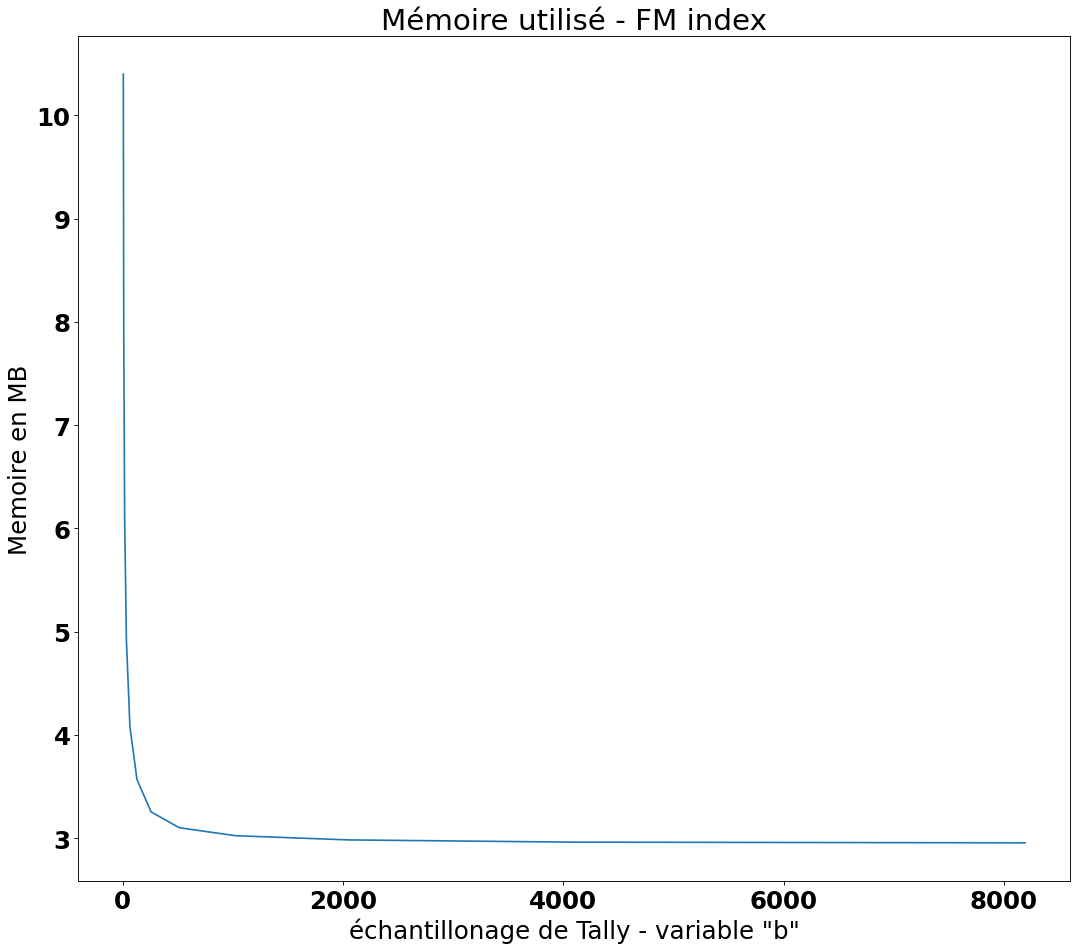

In [77]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('échantillonage de Tally - variable "b"')
# naming the y axis
plt.ylabel('Memoire en MB')
  
# giving a title to my graph
plt.title("Mémoire utilisé - FM index")
  
# function to show the plot
plt.show()

In [44]:
fm.hasSubstring('aaba')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Temps d'exécution recheche motif - choix de “b” - échantillonnage du Tally

In [78]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
for cpIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  start = time.time()
  
  fm = FmIndex(result1)
  matches = sorted(fm.occurrences(result2))
  print(matches)

  end = time.time()

# stopping the library
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(cpIval)
  list_time_i.append((end-start) * 10**3)
  
# record end time

 
# print the difference between start



4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2324.6920108795166 ms
8
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2287.684679031372 ms
16
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2321.617364883423 ms
32
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2404.693841934204 ms
64
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2312.031030654907 ms
128
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2297.849416732788 ms
256
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2245.6178665161133 ms
512
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2340.851306915283 ms
1024
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2353.273868560791 ms
2048
[25889, 49048, 63986, 82697, 95345]
The time of execut

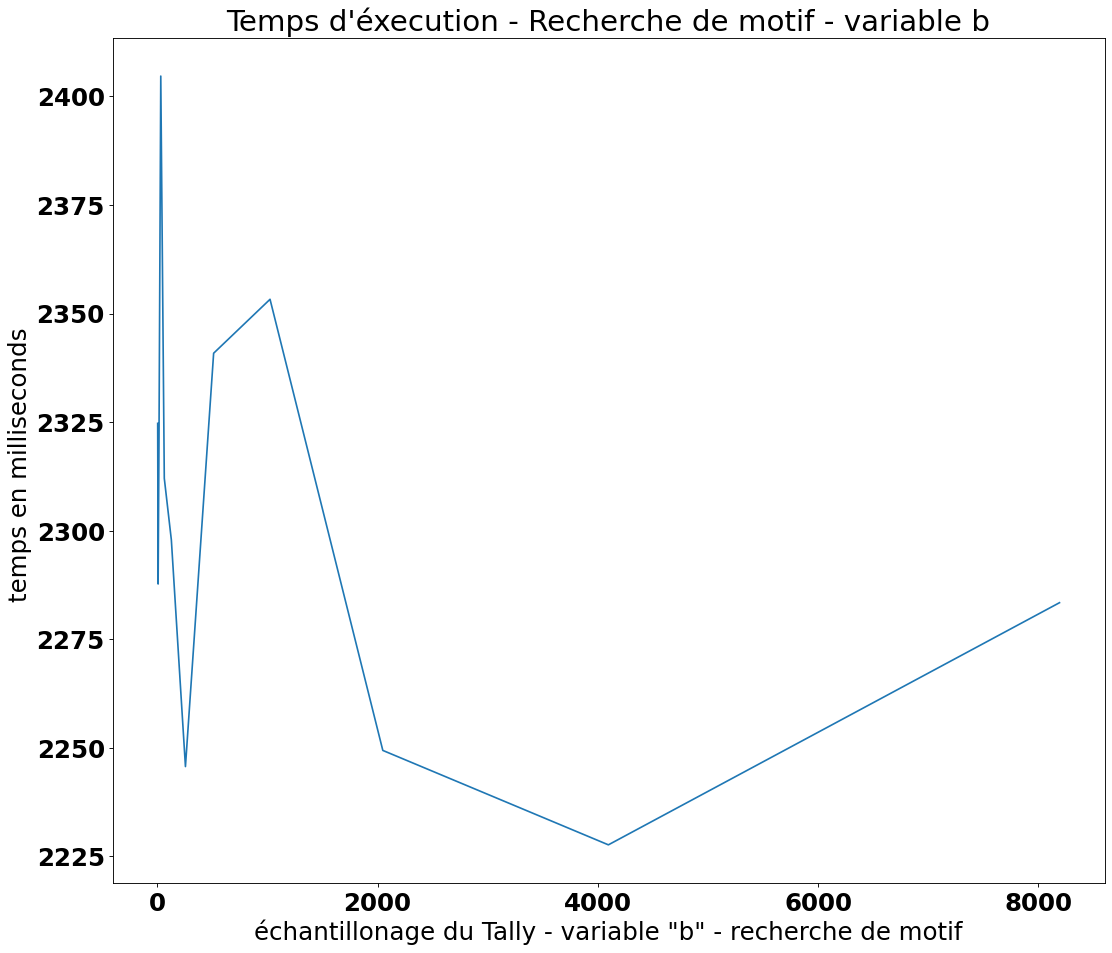

In [79]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('échantillonage du Tally - variable "b" - recherche de motif')
# naming the y axis
plt.ylabel('temps en milliseconds ')
  
# giving a title to my graph
plt.title("Temps d'éxecution - Recherche de motif - variable b")
  
# function to show the plot
plt.show()

'ebwrewrewrbwbebrb.b'

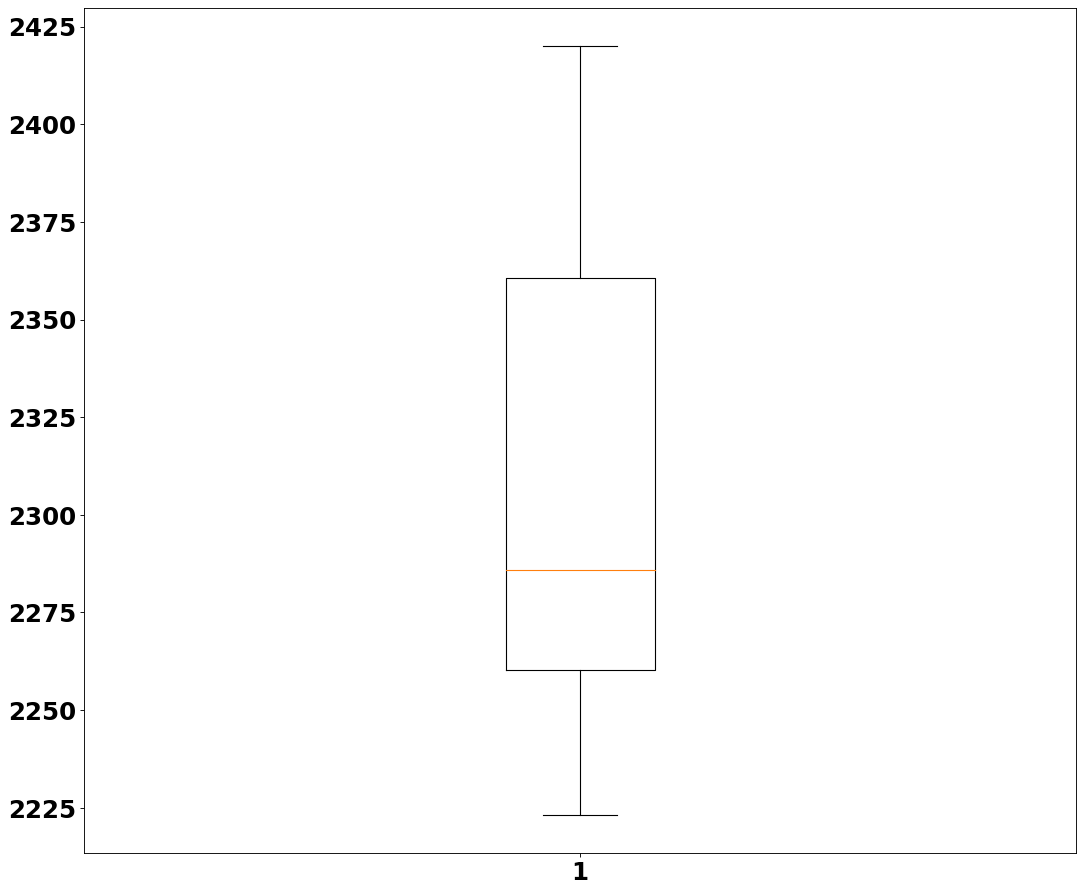

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
plt.boxplot(list_time_i)
 
# show plot
plt.show()

# Impact mémoire - choix de “a” - échantillonnage du tableau de suffixe

In [88]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
cpIval=4
for ssaIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  tracemalloc.start()
  start = time.time()
  
  fm = FmIndex(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(ssaIval)
  
# record end time

 
# print the difference between start



4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.394808
The time of execution of above program is : 3462.350606918335 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.385955
The time of execution of above program is : 3664.5703315734863 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.363263
The time of execution of above program is : 3494.649887084961 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.365163
The time of execution of above program is : 3540.792226791382 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.365107
The time of execution of above program is : 3474.174737930298 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.380298
The time of execution of above program is : 3712.6784324645996 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.365035
The time of execution of above program is : 3526.7069339752197 ms
4
25 memory blocks: 4889.1 KiB
46614212608
used memory : 10.365095
The ti

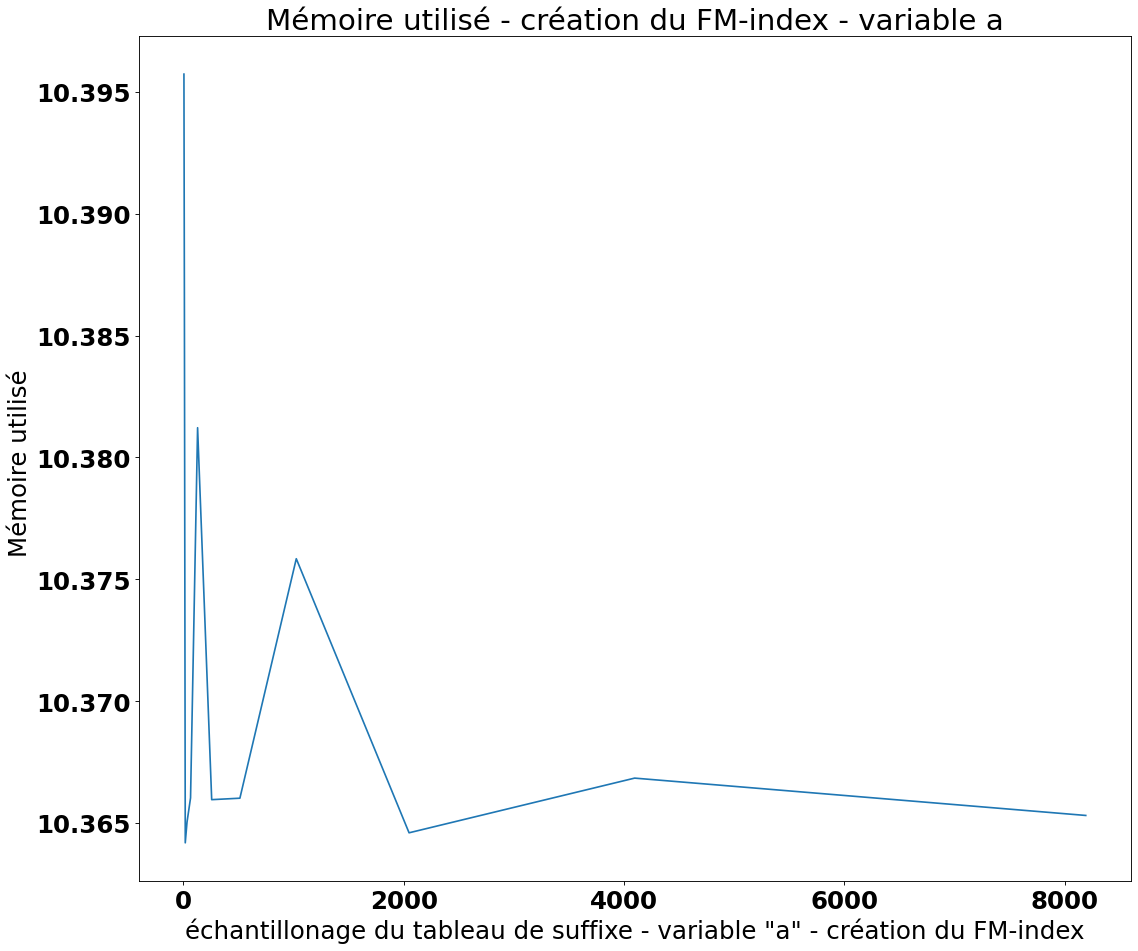

In [89]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('échantillonage du tableau de suffixe - variable "a" - création du FM-index')
# naming the y axis
plt.ylabel('Mémoire utilisé ')
  
# giving a title to my graph
plt.title("Mémoire utilisé - création du FM-index - variable a")
  
# function to show the plot
plt.show()

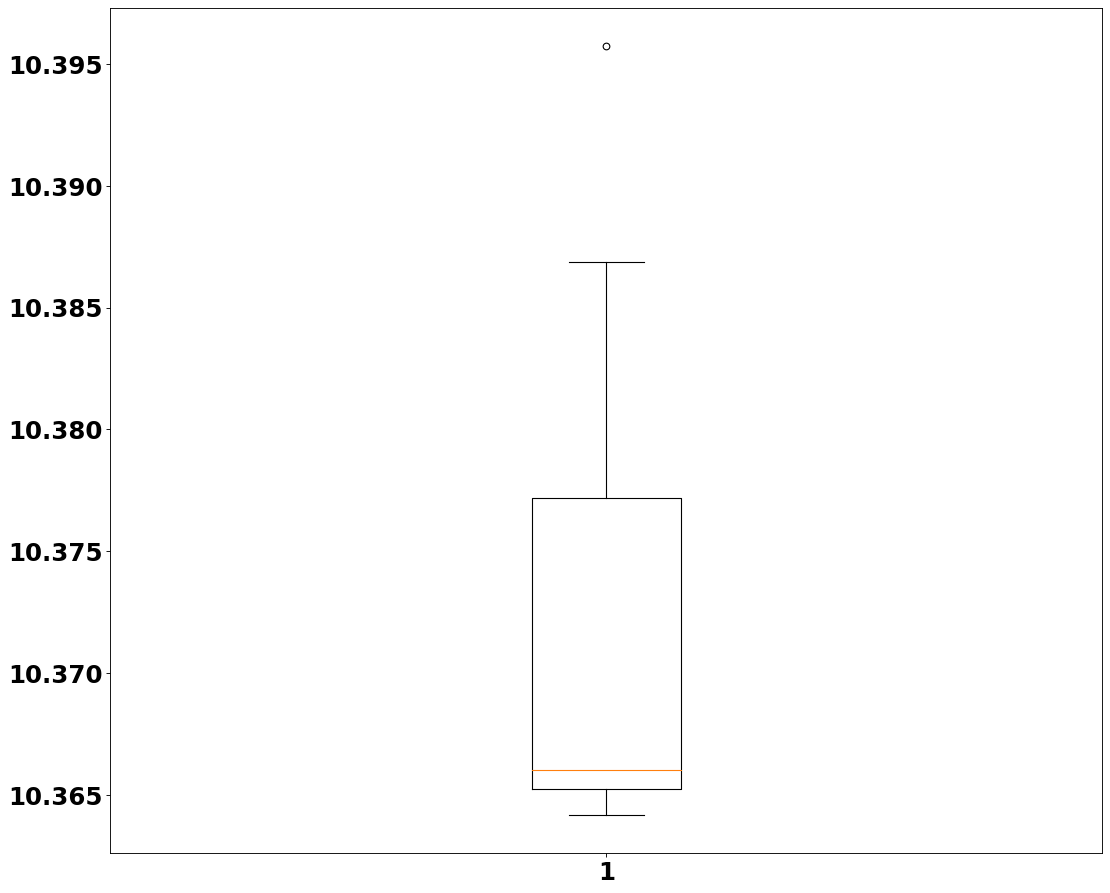

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
plt.boxplot(list_time_i)
 
# show plot
plt.show()

# Temps d'exécution recherche motif - choix de “a” - échantillonnage du tableau de suffixe

In [82]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]

#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0

cpIval=4
for ssaIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  start = time.time()
  
  fm = FmIndex(result1)
  matches = sorted(fm.occurrences(result2))
  print(matches)

  end = time.time()

# stopping the library
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(ssaIval)
  list_time_i.append((end-start) * 10**3)
  
# record end time

 
# print the difference between start



4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2363.475799560547 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2345.470905303955 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2560.0879192352295 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2336.193323135376 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2357.604503631592 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2338.332414627075 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2352.5850772857666 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2572.3190307617188 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above program is : 2350.1791954040527 ms
4
[25889, 49048, 63986, 82697, 95345]
The time of execution of above 

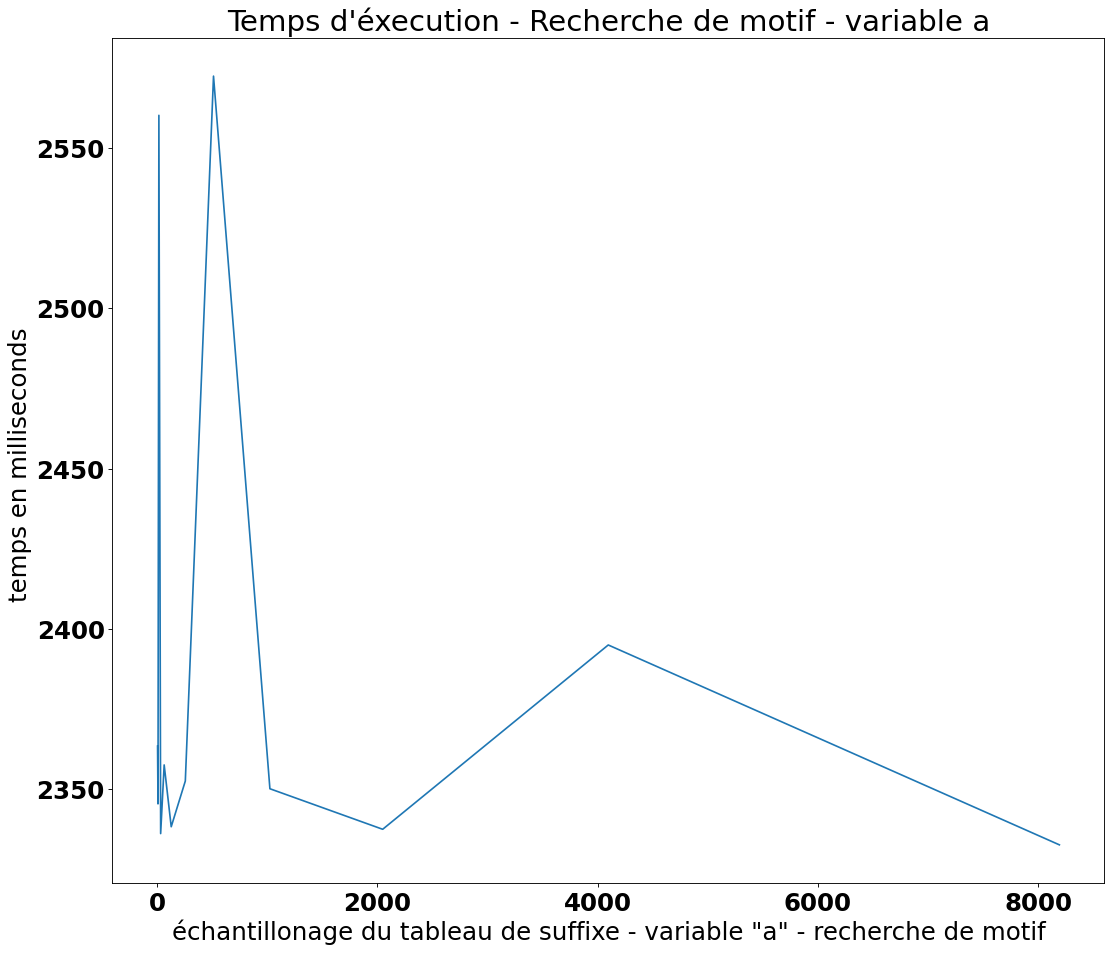

In [83]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  
# x axis values
x = list_i
# corresponding y axis values
y = list_time_i
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('échantillonage du tableau de suffixe - variable "a" - recherche de motif')
# naming the y axis
plt.ylabel('temps en milliseconds ')
  
# giving a title to my graph
plt.title("Temps d'éxecution - Recherche de motif - variable a")
  
# function to show the plot
plt.show()

#PARTIE 3

# **Comparaison de la place mémoire entre FM-index et Tableau de suffixes - échantillonnage du tableau de suffixes - variable “a”**

In [84]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]

list_i_suffix=[]
list_time_i_suffix=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
cpIval=4
for ssaIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  tracemalloc.start()
  start = time.time()
  
  fm = FmIndex(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(ssaIval)


  print("##############--------------################")

  tracemalloc.start()
  start = time.time()
  
  
  s_array=suffixArray(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i_suffix.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i_suffix.append(ssaIval)

  
# record end time

 
# print the difference between start



4
25 memory blocks: 4889.1 KiB
46613360640
used memory : 10.376167
The time of execution of above program is : 3699.54514503479 ms
##############--------------################
101796 memory blocks: 2836.9 KiB
46613360640
used memory : 3.804054
The time of execution of above program is : 3062.6585483551025 ms
4
25 memory blocks: 4889.1 KiB
46613360640
used memory : 10.285687
The time of execution of above program is : 3560.4615211486816 ms
##############--------------################
101839 memory blocks: 2839.2 KiB
46613360640
used memory : 3.709001
The time of execution of above program is : 3328.7696838378906 ms
4
25 memory blocks: 4889.1 KiB
46613360640
used memory : 10.371639
The time of execution of above program is : 3443.1843757629395 ms
##############--------------################
101779 memory blocks: 2836.0 KiB
46613360640
used memory : 3.799765
The time of execution of above program is : 3047.8928089141846 ms
4
25 memory blocks: 4889.1 KiB
46613360640
used memory : 10.382215

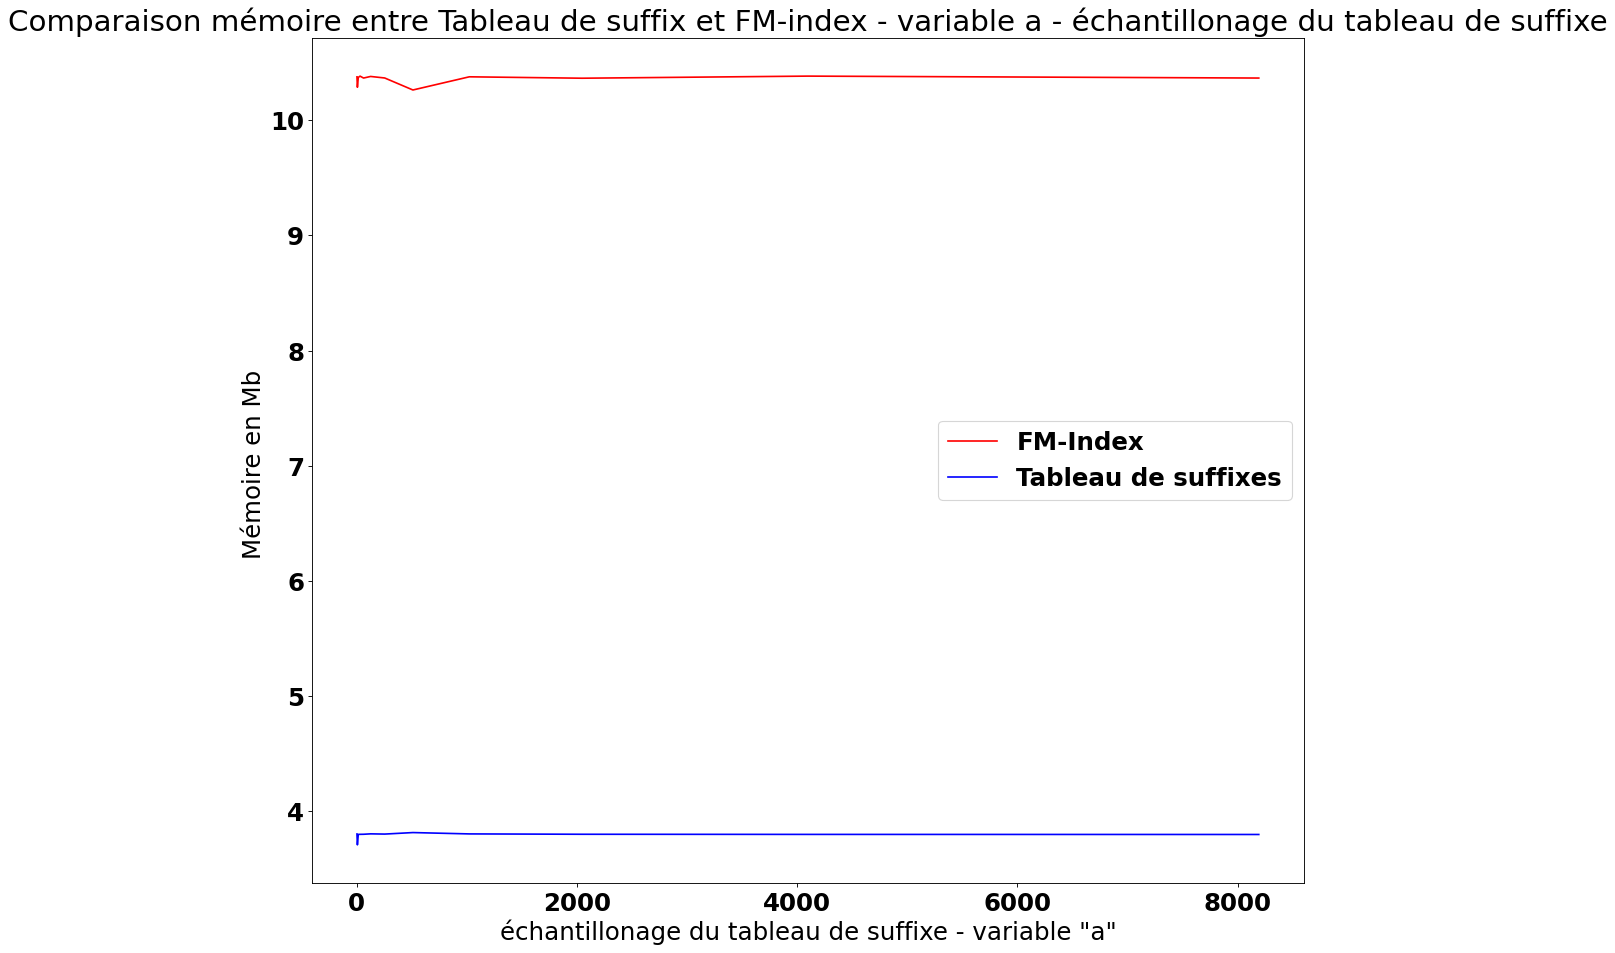

In [85]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  

plt.plot(list_i, list_time_i, 'r',label='FM-Index') # plotting t, a separately 
plt.plot(list_i_suffix, list_time_i_suffix, 'b',label='Tableau de suffixes') # plotting t, b separately  # plotting t, c separately

plt.xlabel('échantillonage du tableau de suffixe - variable "a"')
# naming the y axis
plt.ylabel('Mémoire en Mb ')
  
# giving a title to my graph
plt.title("Comparaison mémoire entre Tableau de suffix et FM-index - variable a - échantillonage du tableau de suffixe")
plt.legend()
plt.show()

# Comparaison de la place mémoire entre FM-index et Tableau de suffixes - échantillonnage du Tally - variable “b”

In [86]:
cpIval=[4,6,8,16,32,64,124,254]

import tracemalloc

import time
 
# record start time
list_i=[]
list_time_i=[]

list_i_suffix=[]
list_time_i_suffix=[]
#gg=[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
 
# define a sample code segment
a = 0
ssaIval=4

for cpIval in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]:
  tracemalloc.start()
  start = time.time()
  
  fm = FmIndex(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i.append(cpIval)


  print("##############--------------################")

  tracemalloc.start()
  start = time.time()
  
  
  s_array=suffixArray(result1)

  snapshot = tracemalloc.take_snapshot()
  top_stats = snapshot.statistics('traceback')

  # pick the biggest memory block
  stat = top_stats[0]
  print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024)) 

  process = psutil.Process(os.getpid())
  print((process.memory_info().rss))
  end = time.time()
  print("used memory :", tracemalloc.get_traced_memory()[0]/10**6)
  list_time_i_suffix.append(tracemalloc.get_traced_memory()[0]/10**6)
# stopping the library
  tracemalloc.stop()
  # and end time in milli. secs
  print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")
  list_i_suffix.append(cpIval)

  
# record end time

 
# print the difference between start



4
25 memory blocks: 4889.1 KiB
46615330816
used memory : 10.395528
The time of execution of above program is : 3600.506067276001 ms
##############--------------################
101796 memory blocks: 2836.9 KiB
46615330816
used memory : 3.806678
The time of execution of above program is : 3016.7009830474854 ms
8
25 memory blocks: 2708.4 KiB
46615330816
used memory : 7.894695
The time of execution of above program is : 3396.294355392456 ms
##############--------------################
101794 memory blocks: 2836.8 KiB
46615330816
used memory : 3.803901
The time of execution of above program is : 3258.5043907165527 ms
16
64506 memory blocks: 1763.8 KiB
46615330816
used memory : 6.107314
The time of execution of above program is : 3407.1080684661865 ms
##############--------------################
101786 memory blocks: 2836.3 KiB
46615330816
used memory : 3.804265
The time of execution of above program is : 3000.840425491333 ms
32
46910 memory blocks: 1282.7 KiB
46615330816
used memory : 4.92

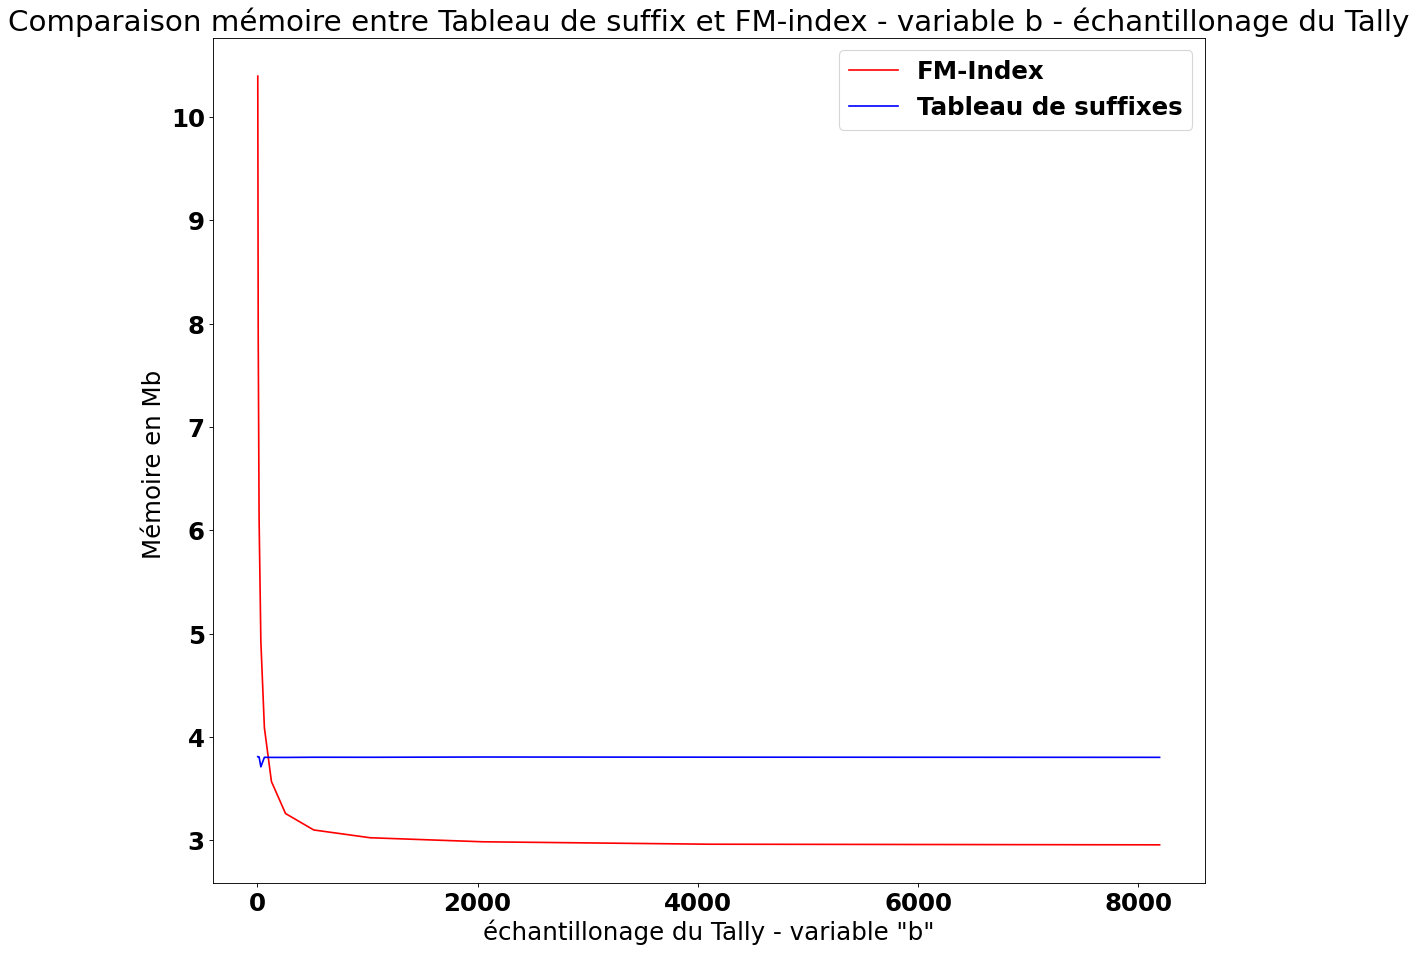

In [87]:

# importing the required module
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

figure(figsize=(16, 14), dpi=80)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
  

plt.plot(list_i, list_time_i, 'r',label='FM-Index') # plotting t, a separately 
plt.plot(list_i_suffix, list_time_i_suffix, 'b',label='Tableau de suffixes') # plotting t, b separately  # plotting t, c separately

plt.xlabel('échantillonage du Tally - variable "b"')
# naming the y axis
plt.ylabel('Mémoire en Mb ')
  
# giving a title to my graph
plt.title("Comparaison mémoire entre Tableau de suffix et FM-index - variable b - échantillonage du Tally")
plt.legend()
plt.show()